Задание.

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;

данные о видео из трендов YouTube;

данные об уровне счастья в разных странах;

данные по фильмам и сериалам Netflix.

In [2]:
#Загрузим необходимы библиотеки и посмотрим что в файле.
import pandas as pd
import matplotlib.pyplot as plt
import re

data = pd.read_csv('netflix_titles.csv')

data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


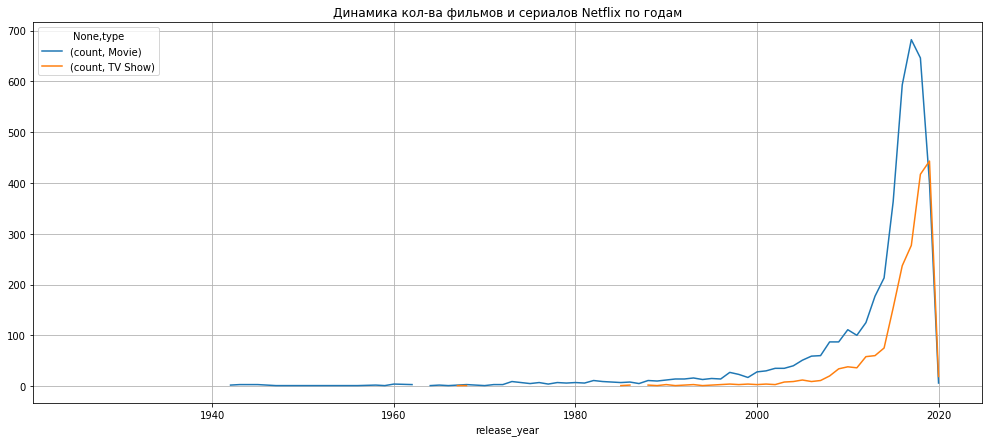

In [22]:
# График 1 - Динамика кол-ва фильмов и сериалов Netflix по годам
# Немного увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 17,7

graph1 = data.groupby(['release_year','type']).agg(['count'])['show_id'].sort_values('release_year')
graph1.unstack('type').plot(title='Динамика кол-ва фильмов и сериалов Netflix по годам', grid=True)
# Начиная с 2000 года в компании произошли какие то изменения, что улучшило их положение. Но на этом не остановилась,
# примерно ещё два события какие то здорова помогло им.
# Если погуглить, то мы узнаем интересный факт: В середине 2000-х годов скорость передачи данных значительно повысилась, 
# что позволило клиентам загружать фильмы из сети.
# Правильно оценив перспективы, основатели прорабатывали новую возмножность и устремилась в онлайн.
# И с 2010 года начинает распроранять свои фильмы по всему миру.
# Хорошо спланированные мероприятия по получению бюджета и наращивания кол-ва фильтом / сериало, помогло расшириться.
# Хоть шоу и популярны, кол-во фильтом всеровно превышает,ведь намного популярнее и больше чем тв шоу, которые в свою очередь
# показываются многократно в отличии от фильмов.
# на 2020 год, данные пока отсутствуют.

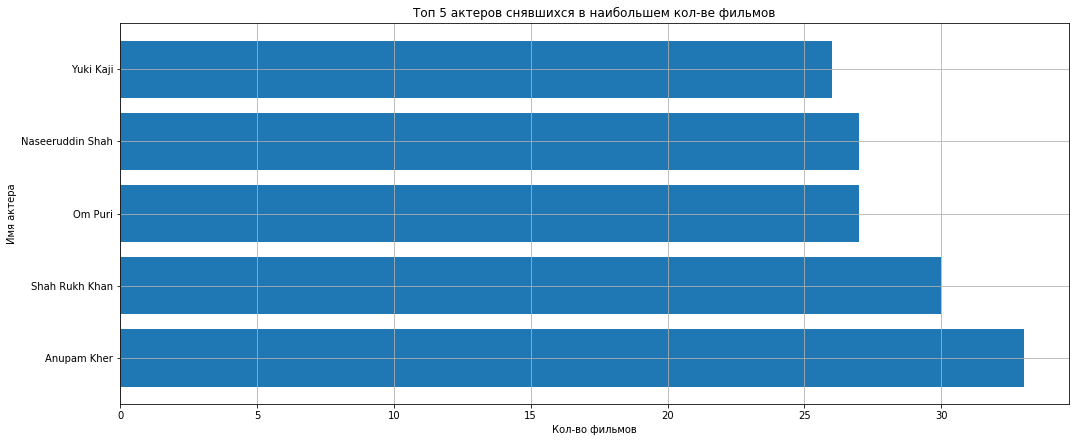

In [23]:
# График 2 - Актеры снявшиеся с наибольшем кол-ве фильмов и сериалов
actors = {}
movies = data['cast'].apply(lambda x: x.split(", ") if isinstance(x, str) else "")
for movie in movies:
    for actor in movie:
        if actor not in actors: actors[actor]=0
        actors[actor]+=1

graph2 = pd.DataFrame.from_dict(actors, orient='index', columns=['count']).reset_index().\
    sort_values('count', ascending=False).head(5)

plt.barh(graph2['index'], graph2['count'])
plt.xlabel('Кол-во фильмов')
plt.ylabel('Имя актера')
plt.title('Топ 5 актеров снявшихся в наибольшем кол-ве фильмов')
plt.grid()

#Могу предположить, что в Болливуде снимается не так много актеров как в США, поэтому одни актер может поучаствоваться
#в большом кол-ве фильмов.

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

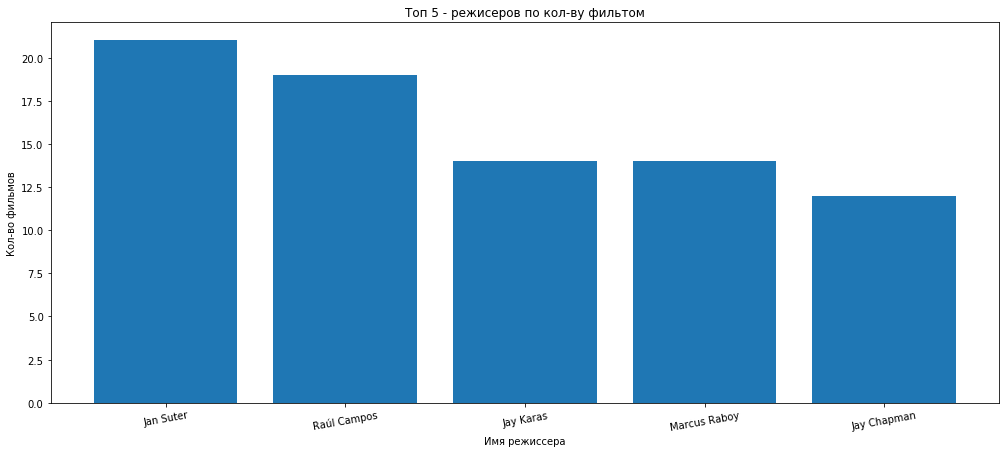

In [27]:
# График 3 - Топ 5 - режисеров по кол-ву фильтом
directors = {}
movies = data['director'].apply(lambda x: x.split(", ") if isinstance(x, str) else "")
for movie in movies:
    for director in movie:
        if director not in directors: directors[director]=0
        directors[director]+=1
        
graph3 = pd.DataFrame.from_dict(directors, orient='index', columns=['count'])
graph3 = graph3.sort_values('count', ascending=False).reset_index().head(5)
plt.bar(graph3['index'], graph3['count'])
plt.xlabel('Имя режиссера')
plt.ylabel('Кол-во фильмов')
plt.title('Топ 5 - режисеров по кол-ву фильтом')
plt.xticks(rotation=10)
# Не разбираюсь в фильмах/ актерах / режисерах, наверно это самые идейные люди, которые смогли реализовать макисальное
# кол-во своих задумак, но остаеться вопрос в качестве и популряности их произведений, надо разбираться. Так же учитывая
# что Netflix это американская компания, и фильмы и сериалы популярные американские, то и тут в топе американские кинорежисеры.

In [29]:
# График 4 - График по количеству выпущенных фильмов и ТВ шоу по странам.
countries = pd.DataFrame(columns=['id','country', 'type'])

def prepare(vid, vcountry, vtype):
    if(isinstance(vcountry, str)):
        ctrs = vcountry.split(",")
        for ctr in ctrs:
            i = len(countries.index)
            countries.loc[i] = [vid] + [ctr.strip()] + [vtype]

data.apply(lambda x: prepare(x['show_id'], x['country'], x['type']), axis=1)
graph4 = countries.groupby(['country', 'type']).agg(['count'])['id'].\
    sort_values(by='count', ascending=False).head(5)
graph4.style.bar()
# Похоже что США наболее продуктивен в создании фильмов, но тут интересно многое бы уточнить в данных. С какого года
# выпускаются у этих стран, какие именно фильмы учитываются, есть же фильмы от популярных кинорежисеров и не очень, и т.д.
# Цифра 1924 очень приманимает к более детальному анализу, т.к. почти в 1,5 раза больше Индии. А Индия главный конкурент.